# 1. Import and Install Dependencies

In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install mediapipe

: 

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
import random
def get_random():
    x = random.randint(-60, 60)
    y = random.randint(-80, 80)
    r = random.randint(-4, 4)
    s = random.randint(95, 100) / 100
    return x,y,r,s

def trans_img(frame,x,y,r,s):
    
    rows, cols = frame.shape[:2]
    M = np.float32([[1, 0, x], [0, 1, y]])
    dst = cv2.warpAffine(frame, M, (cols, rows))

    M = np.float32([[1,  0, 0], [0, -1, rows], [0,  0, 1]])
    frame = cv2.warpAffine(dst,cv2.getRotationMatrix2D((cols/2, rows/2),r, s),(cols, rows))
    return frame

In [16]:

# Set mediapipe model 

cap = cv2.VideoCapture('videos/hello.mp4')

# define a video capture object
x,y,r,s = get_random()
with mp_holistic.Holistic(min_detection_confidence=0, min_tracking_confidence=0) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        
        if ret:
            #frame = trans_img(frame,x,y,r,s)
            # Make detections
            
            image, results = mediapipe_detection(frame, holistic)
            

            # Draw landmarks
            draw_styled_landmarks(image, results)

            # Show to screen
            cv2.imshow('OpenCV Feed', image)
        else:
            cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
            continue

        # Break gracefully
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [17]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [18]:
results

mediapipe.python.solution_base.SolutionOutputs

In [19]:
draw_landmarks(frame, results)

hello


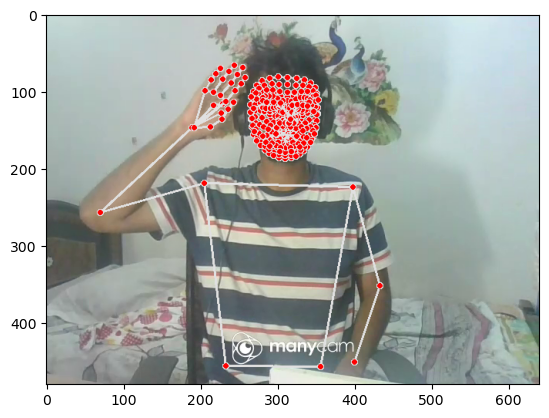

In [20]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
print('hello')

Hello

# 3. Extract Keypoint Values

In [12]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [7]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

NameError: name 'results' is not defined

In [7]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

NameError: name 'results' is not defined

In [15]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


IndentationError: unexpected indent (1373052555.py, line 2)

In [8]:
    def extract_keypoints(results):
        pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
        face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
        lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
        rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
        return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.49460015,  0.28271595, -0.83563864, ...,  0.21623649,
        0.11595307, -0.01728244])

In [19]:
468*3+33*4+21*3+21*3

1662

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.49460015,  0.28271595, -0.83563864, ...,  0.21623649,
        0.11595307, -0.01728244])

# 4. Setup Folders for Collection

In [15]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
#actions = np.array(['bad'])

# Thirty videos worth of data
no_sequences = 100

# Videos are going to be 30 frames in length
sequence_length = 30

In [93]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [24]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [25]:
cap = cv2.VideoCapture(2)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0, min_tracking_confidence=0) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            x,y,r,s = get_random()
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                if ret:
                  frame = trans_img(frame,x,y,r,s)
                  # Make detections
                  image, results = mediapipe_detection(frame, holistic)
  #                 print(results)

                  # Draw landmarks
                  draw_styled_landmarks(image, results)
                  
                  # NEW Apply wait logic
                  if frame_num == 0: 
                      cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                      cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                      # Show to screen
                      cv2.imshow('OpenCV Feed', image)
                      cv2.waitKey(1)
                  else: 
                      cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                      # Show to screen
                      cv2.imshow('OpenCV Feed', image)
                  
                  # NEW Export keypoints
                  keypoints = extract_keypoints(results)
                  npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                  np.save(npy_path, keypoints)
                else:
                  cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
                  continue


                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [24]:
cap.release()
cv2.destroyAllWindows()

In [19]:
l = ['bad',
 'good',
 'he',
 'hello',
 'like',
 'look',
 'me',
 'meet',
 'nice',
 'no',
 'sorry',
 'thanks',
 'that',
 'yes',
 'you']

In [ ]:
for i in l:
    DATA_PATH = os.path.join('MP_Data') 

    # Actions that we try to detect
    actions = np.array([i])

    # Thirty videos worth of data
    no_sequences = 100

    # Videos are going to be 30 frames in length
    sequence_length = 150

    for action in actions: 
        for sequence in range(no_sequences):
            try: 
                os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
            except:
                pass

    cap = cv2.VideoCapture('videos/'+i+'.mp4')
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0, min_tracking_confidence=0) as holistic:

        # NEW LOOP
        # Loop through actions
        for action in actions:
            # Loop through sequences aka videos
            for sequence in range(no_sequences):
                # Loop through video length aka sequence length
                x,y,r,s = get_random()
                for frame_num in range(sequence_length):

                    # Read feed
                    ret, frame = cap.read()
                    if ret:
                        frame = trans_img(frame,x,y,r,s)
                        # Make detections
                        image, results = mediapipe_detection(frame, holistic)
        #                 print(results)

                        # Draw landmarks
                        draw_styled_landmarks(image, results)

                        # NEW Apply wait logic
                        if frame_num == 0: 
                            cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                            cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                            # Show to screen
                            cv2.imshow('OpenCV Feed', image)
                            cv2.waitKey(1)
                        else: 
                            cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                            # Show to screen
                            cv2.imshow('OpenCV Feed', image)

                        # NEW Export keypoints
                        keypoints = extract_keypoints(results)
                        npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                        np.save(npy_path, keypoints)
                    else:
                        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
                        continue
                        

                    # Break gracefully
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break

cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [9]:
actions = np.array(['angry',
 'apple',
 'bad',
 'come',
 'cook',
 'dad',
 'dance',
 'drink',
 'eat',
 'fan',
 'friend',
 'go',
 'good',
 'happy',
 'he',
 'hello',
 'help',
 'home',
 'hospital',
 'how',
 'hungry',
 'like',
 'look',
 'me',
 'meet',
 'mom',
 'money',
 'nice',
 'no',
 'play',
 'read',
 'run',
 'sad',
 'school',
 'sleep',
 'smell',
 'sorry',
 'thanks',
 'that',
 'today',
 'tomorrow',
 'ugly',
 'umbrella',
 'want',
 'what',
 'when',
 'which',
 'yes',
 'yesterday',
 'you'])

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [12]:
label_map = {label:num for num, label in enumerate(actions)}

In [13]:
label_map

{'hello': 0, 'like': 1}

In [16]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            try:
                res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)),allow_pickle=True)
                window.append(res)
            except:
                if frame_num == 0:
                    res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num+1)))
                    window.append(res)
                else:
                    res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num-1)))
                    window.append(res)
            print(action,sequence,frame_num)
        sequences.append(window)
        labels.append(label_map[action])

hello 0 0
hello 0 1
hello 0 2
hello 0 3
hello 0 4
hello 0 5
hello 0 6
hello 0 7
hello 0 8
hello 0 9
hello 0 10
hello 0 11
hello 0 12
hello 0 13
hello 0 14
hello 0 15
hello 0 16
hello 0 17
hello 0 18
hello 0 19
hello 0 20
hello 0 21
hello 0 22
hello 0 23
hello 0 24
hello 0 25
hello 0 26
hello 0 27
hello 0 28
hello 0 29
hello 1 0
hello 1 1
hello 1 2
hello 1 3
hello 1 4
hello 1 5
hello 1 6
hello 1 7
hello 1 8
hello 1 9
hello 1 10
hello 1 11
hello 1 12
hello 1 13
hello 1 14
hello 1 15
hello 1 16
hello 1 17
hello 1 18
hello 1 19
hello 1 20
hello 1 21
hello 1 22
hello 1 23
hello 1 24
hello 1 25
hello 1 26
hello 1 27
hello 1 28
hello 1 29
hello 2 0
hello 2 1
hello 2 2
hello 2 3
hello 2 4
hello 2 5
hello 2 6
hello 2 7
hello 2 8
hello 2 9
hello 2 10
hello 2 11
hello 2 12
hello 2 13
hello 2 14
hello 2 15
hello 2 16
hello 2 17
hello 2 18
hello 2 19
hello 2 20
hello 2 21
hello 2 22
hello 2 23
hello 2 24
hello 2 25
hello 2 26
hello 2 27
hello 2 28
hello 2 29
hello 3 0
hello 3 1
hello 3 2
hello 3 3


hello 25 26
hello 25 27
hello 25 28
hello 25 29
hello 26 0
hello 26 1
hello 26 2
hello 26 3
hello 26 4
hello 26 5
hello 26 6
hello 26 7
hello 26 8
hello 26 9
hello 26 10
hello 26 11
hello 26 12
hello 26 13
hello 26 14
hello 26 15
hello 26 16
hello 26 17
hello 26 18
hello 26 19
hello 26 20
hello 26 21
hello 26 22
hello 26 23
hello 26 24
hello 26 25
hello 26 26
hello 26 27
hello 26 28
hello 26 29
hello 27 0
hello 27 1
hello 27 2
hello 27 3
hello 27 4
hello 27 5
hello 27 6
hello 27 7
hello 27 8
hello 27 9
hello 27 10
hello 27 11
hello 27 12
hello 27 13
hello 27 14
hello 27 15
hello 27 16
hello 27 17
hello 27 18
hello 27 19
hello 27 20
hello 27 21
hello 27 22
hello 27 23
hello 27 24
hello 27 25
hello 27 26
hello 27 27
hello 27 28
hello 27 29
hello 28 0
hello 28 1
hello 28 2
hello 28 3
hello 28 4
hello 28 5
hello 28 6
hello 28 7
hello 28 8
hello 28 9
hello 28 10
hello 28 11
hello 28 12
hello 28 13
hello 28 14
hello 28 15
hello 28 16
hello 28 17
hello 28 18
hello 28 19
hello 28 20
hello 28 2

hello 57 15
hello 57 16
hello 57 17
hello 57 18
hello 57 19
hello 57 20
hello 57 21
hello 57 22
hello 57 23
hello 57 24
hello 57 25
hello 57 26
hello 57 27
hello 57 28
hello 57 29
hello 58 0
hello 58 1
hello 58 2
hello 58 3
hello 58 4
hello 58 5
hello 58 6
hello 58 7
hello 58 8
hello 58 9
hello 58 10
hello 58 11
hello 58 12
hello 58 13
hello 58 14
hello 58 15
hello 58 16
hello 58 17
hello 58 18
hello 58 19
hello 58 20
hello 58 21
hello 58 22
hello 58 23
hello 58 24
hello 58 25
hello 58 26
hello 58 27
hello 58 28
hello 58 29
hello 59 0
hello 59 1
hello 59 2
hello 59 3
hello 59 4
hello 59 5
hello 59 6
hello 59 7
hello 59 8
hello 59 9
hello 59 10
hello 59 11
hello 59 12
hello 59 13
hello 59 14
hello 59 15
hello 59 16
hello 59 17
hello 59 18
hello 59 19
hello 59 20
hello 59 21
hello 59 22
hello 59 23
hello 59 24
hello 59 25
hello 59 26
hello 59 27
hello 59 28
hello 59 29
hello 60 0
hello 60 1
hello 60 2
hello 60 3
hello 60 4
hello 60 5
hello 60 6
hello 60 7
hello 60 8
hello 60 9
hello 60 1

hello 82 3
hello 82 4
hello 82 5
hello 82 6
hello 82 7
hello 82 8
hello 82 9
hello 82 10
hello 82 11
hello 82 12
hello 82 13
hello 82 14
hello 82 15
hello 82 16
hello 82 17
hello 82 18
hello 82 19
hello 82 20
hello 82 21
hello 82 22
hello 82 23
hello 82 24
hello 82 25
hello 82 26
hello 82 27
hello 82 28
hello 82 29
hello 83 0
hello 83 1
hello 83 2
hello 83 3
hello 83 4
hello 83 5
hello 83 6
hello 83 7
hello 83 8
hello 83 9
hello 83 10
hello 83 11
hello 83 12
hello 83 13
hello 83 14
hello 83 15
hello 83 16
hello 83 17
hello 83 18
hello 83 19
hello 83 20
hello 83 21
hello 83 22
hello 83 23
hello 83 24
hello 83 25
hello 83 26
hello 83 27
hello 83 28
hello 83 29
hello 84 0
hello 84 1
hello 84 2
hello 84 3
hello 84 4
hello 84 5
hello 84 6
hello 84 7
hello 84 8
hello 84 9
hello 84 10
hello 84 11
hello 84 12
hello 84 13
hello 84 14
hello 84 15
hello 84 16
hello 84 17
hello 84 18
hello 84 19
hello 84 20
hello 84 21
hello 84 22
hello 84 23
hello 84 24
hello 84 25
hello 84 26
hello 84 27
hello 8

like 6 26
like 6 27
like 6 28
like 6 29
like 7 0
like 7 1
like 7 2
like 7 3
like 7 4
like 7 5
like 7 6
like 7 7
like 7 8
like 7 9
like 7 10
like 7 11
like 7 12
like 7 13
like 7 14
like 7 15
like 7 16
like 7 17
like 7 18
like 7 19
like 7 20
like 7 21
like 7 22
like 7 23
like 7 24
like 7 25
like 7 26
like 7 27
like 7 28
like 7 29
like 8 0
like 8 1
like 8 2
like 8 3
like 8 4
like 8 5
like 8 6
like 8 7
like 8 8
like 8 9
like 8 10
like 8 11
like 8 12
like 8 13
like 8 14
like 8 15
like 8 16
like 8 17
like 8 18
like 8 19
like 8 20
like 8 21
like 8 22
like 8 23
like 8 24
like 8 25
like 8 26
like 8 27
like 8 28
like 8 29
like 9 0
like 9 1
like 9 2
like 9 3
like 9 4
like 9 5
like 9 6
like 9 7
like 9 8
like 9 9
like 9 10
like 9 11
like 9 12
like 9 13
like 9 14
like 9 15
like 9 16
like 9 17
like 9 18
like 9 19
like 9 20
like 9 21
like 9 22
like 9 23
like 9 24
like 9 25
like 9 26
like 9 27
like 9 28
like 9 29
like 10 0
like 10 1
like 10 2
like 10 3
like 10 4
like 10 5
like 10 6
like 10 7
like 10 8


like 33 4
like 33 5
like 33 6
like 33 7
like 33 8
like 33 9
like 33 10
like 33 11
like 33 12
like 33 13
like 33 14
like 33 15
like 33 16
like 33 17
like 33 18
like 33 19
like 33 20
like 33 21
like 33 22
like 33 23
like 33 24
like 33 25
like 33 26
like 33 27
like 33 28
like 33 29
like 34 0
like 34 1
like 34 2
like 34 3
like 34 4
like 34 5
like 34 6
like 34 7
like 34 8
like 34 9
like 34 10
like 34 11
like 34 12
like 34 13
like 34 14
like 34 15
like 34 16
like 34 17
like 34 18
like 34 19
like 34 20
like 34 21
like 34 22
like 34 23
like 34 24
like 34 25
like 34 26
like 34 27
like 34 28
like 34 29
like 35 0
like 35 1
like 35 2
like 35 3
like 35 4
like 35 5
like 35 6
like 35 7
like 35 8
like 35 9
like 35 10
like 35 11
like 35 12
like 35 13
like 35 14
like 35 15
like 35 16
like 35 17
like 35 18
like 35 19
like 35 20
like 35 21
like 35 22
like 35 23
like 35 24
like 35 25
like 35 26
like 35 27
like 35 28
like 35 29
like 36 0
like 36 1
like 36 2
like 36 3
like 36 4
like 36 5
like 36 6
like 36 7


like 58 23
like 58 24
like 58 25
like 58 26
like 58 27
like 58 28
like 58 29
like 59 0
like 59 1
like 59 2
like 59 3
like 59 4
like 59 5
like 59 6
like 59 7
like 59 8
like 59 9
like 59 10
like 59 11
like 59 12
like 59 13
like 59 14
like 59 15
like 59 16
like 59 17
like 59 18
like 59 19
like 59 20
like 59 21
like 59 22
like 59 23
like 59 24
like 59 25
like 59 26
like 59 27
like 59 28
like 59 29
like 60 0
like 60 1
like 60 2
like 60 3
like 60 4
like 60 5
like 60 6
like 60 7
like 60 8
like 60 9
like 60 10
like 60 11
like 60 12
like 60 13
like 60 14
like 60 15
like 60 16
like 60 17
like 60 18
like 60 19
like 60 20
like 60 21
like 60 22
like 60 23
like 60 24
like 60 25
like 60 26
like 60 27
like 60 28
like 60 29
like 61 0
like 61 1
like 61 2
like 61 3
like 61 4
like 61 5
like 61 6
like 61 7
like 61 8
like 61 9
like 61 10
like 61 11
like 61 12
like 61 13
like 61 14
like 61 15
like 61 16
like 61 17
like 61 18
like 61 19
like 61 20
like 61 21
like 61 22
like 61 23
like 61 24
like 61 25
like 61

like 84 23
like 84 24
like 84 25
like 84 26
like 84 27
like 84 28
like 84 29
like 85 0
like 85 1
like 85 2
like 85 3
like 85 4
like 85 5
like 85 6
like 85 7
like 85 8
like 85 9
like 85 10
like 85 11
like 85 12
like 85 13
like 85 14
like 85 15
like 85 16
like 85 17
like 85 18
like 85 19
like 85 20
like 85 21
like 85 22
like 85 23
like 85 24
like 85 25
like 85 26
like 85 27
like 85 28
like 85 29
like 86 0
like 86 1
like 86 2
like 86 3
like 86 4
like 86 5
like 86 6
like 86 7
like 86 8
like 86 9
like 86 10
like 86 11
like 86 12
like 86 13
like 86 14
like 86 15
like 86 16
like 86 17
like 86 18
like 86 19
like 86 20
like 86 21
like 86 22
like 86 23
like 86 24
like 86 25
like 86 26
like 86 27
like 86 28
like 86 29
like 87 0
like 87 1
like 87 2
like 87 3
like 87 4
like 87 5
like 87 6
like 87 7
like 87 8
like 87 9
like 87 10
like 87 11
like 87 12
like 87 13
like 87 14
like 87 15
like 87 16
like 87 17
like 87 18
like 87 19
like 87 20
like 87 21
like 87 22
like 87 23
like 87 24
like 87 25
like 87

In [17]:
np.array(sequences).shape

(200, 30, 1662)

In [18]:
np.array(labels).shape

(200,)

In [19]:
X = np.array(sequences)

In [20]:
X.shape

(200, 30, 1662)

In [21]:
y = to_categorical(labels).astype(int)

In [22]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1,

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [24]:
y_test.shape

(10, 2)

# 7. Build and Train LSTM Neural Network

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
import tensorflow

In [26]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [27]:
class LearningRateReducerCb(tensorflow.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):
    old_lr = self.model.optimizer.lr.read_value()
    new_lr = old_lr * 0.99
    print("\nEpoch: {}. Reducing Learning Rate from {} to {}".format(epoch, old_lr, new_lr))
    self.model.optimizer.lr.assign(new_lr)

In [29]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [31]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [32]:
res = [.7, 0.2, 0.1]

In [33]:
actions[np.argmax(res)]

'hello'

In [34]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [36]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
6/6 [==============================] - 2s 93ms/step - loss: 0.6908 - categorical_accuracy: 0.5158
Epoch 2/500
6/6 [==============================] - 0s 48ms/step - loss: 0.6659 - categorical_accuracy: 0.6526
Epoch 3/500
6/6 [==============================] - 0s 50ms/step - loss: 0.6849 - categorical_accuracy: 0.5947
Epoch 4/500
6/6 [==============================] - 0s 53ms/step - loss: 0.6277 - categorical_accuracy: 0.6842
Epoch 5/500
6/6 [==============================] - 1s 120ms/step - loss: 0.4569 - categorical_accuracy: 0.8368
Epoch 6/500
6/6 [==============================] - 1s 244ms/step - loss: 0.2907 - categorical_accuracy: 0.9000
Epoch 7/500
6/6 [==============================] - 2s 350ms/step - loss: 0.1593 - categorical_accuracy: 0.9579
Epoch 8/500
6/6 [==============================] - 2s 349ms/step - loss: 1.3325 - categorical_accuracy: 0.5632
Epoch 9/500
6/6 [==============================] - 1s 237ms/step - loss: 0.7052 - categorical_accuracy: 0.4947
Epoch

KeyboardInterrupt: 

In [96]:
model.save('modeltest_gpu.h5')

In [72]:
del model

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 596,642
Trainable params: 596,642
Non-tr

# 8. Make Predictions

In [38]:
res = model.predict(X_test)

1/1 [==============================] - 3s 3s/step


In [39]:
actions[np.argmax(res[0])]

'hello'

In [40]:
actions[np.argmax(y_test[0])]

'hello'

# 9. Save Weights

In [183]:
model.save('model17.h5')

In [88]:
del model

In [11]:
from tensorflow.keras.models import load_model
model = load_model('modelfinal_100.h5',compile = False)

In [12]:
model.compile()

# 10. Evaluation using Confusion Matrix and Accuracy

In [41]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [42]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 68ms/step


In [43]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [44]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 8]],

       [[8, 0],
        [0, 2]]], dtype=int64)

In [45]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [46]:
colors = [(245,117,16), (117,245,16), (16,117,245),(16,117,245),(16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (prob*100, 90+num*40), colors[0], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [18]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'res' is not defined

<Figure size 1800x1800 with 0 Axes>

In [19]:
sequence.reverse()

NameError: name 'sequence' is not defined

In [20]:
len(sequence)

NameError: name 'sequence' is not defined

In [21]:
sequence.append('def')

NameError: name 'sequence' is not defined

In [22]:
sequence.reverse()

NameError: name 'sequence' is not defined

In [23]:
sequence[-30:]

NameError: name 'sequence' is not defined

In [17]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8
prev = ""
c = 0
cap = cv2.VideoCapture('videos/good.mp4')
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0),verbose=None)[0]
            pred = actions[np.argmax(res)]
            print(pred)
            '''
            if prev == "":
                prev = pred
                
            if pred == prev:
                c+=1
            else:
                c = 0
                prev = ''
    
            
            if c == 15:
                print(pred)
                c = 0
                prev = ""
            '''
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

In [15]:
l = ['angry',
 'apple',
 'bad',
 'come',
 'cook',
 'dad',
 'dance',
 'drink',
 'eat',
 'fan',
 'friend',
 'go',
 'good',
 'happy',
 'he',
 'hello',
 'help',
 'home',
 'hospital',
 'how',
 'hungry',
 'like',
 'look',
 'me',
 'meet',
 'mom',
 'money',
 'nice',
 'no',
 'play',
 'read',
 'run',
 'sad',
 'school',
 'sleep',
 'smell',
 'sorry',
 'thanks',
 'that',
 'today',
 'tomorrow',
 'ugly',
 'umbrella',
 'want',
 'what',
 'when',
 'which',
 'yes',
 'yesterday',
 'you']

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8
prev = ""
c = 0
for vid in l:
    
    cap = cv2.VideoCapture('videos/'+vid+'.mp4')
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():

            # Read feed
            ret, frame = cap.read()
            if ret:
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                #print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # 2. Prediction logic
                keypoints = extract_keypoints(results)
        #         sequence.insert(0,keypoints)
        #         sequence = sequence[:30]
                sequence.append(keypoints)
                sequence = sequence[-30:]

                if len(sequence) == 30:
                    res = model.predict(np.expand_dims(sequence, axis=0),verbose=None)[0]
                    pred = actions[np.argmax(res)]
                    print(pred)
                    '''
                    if prev == "":
                        prev = pred

                    if pred == prev:
                        c+=1
                    else:
                        c = 0
                        prev = ''


                    if c == 15:
                        print(pred)
                        c = 0
                        prev = ""
                    '''

                # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                else:
                    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
                    continue

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
cap.release()
cv2.destroyAllWindows()

angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
angry
yesterday
bad
angry
angry
angry
angry
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
go
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
apple
today
today
to

money
money
money
money
money
money
money
money
money
money
money
money
money
money
money
money
money
how
money
how
how
how
nice
how
how
how
how
how
how
how
how
money
money
money
money
money
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
school
nice
nice
nice
nice
school
nice
nice
nice
nice
nice
dance
nice
nice
nice
nice
nice
nice
nice
school
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
nice
how
nice
today
nice
nice
nice
today
today
today
today
today
today
apple
apple
sad
sad
sad
sad
sad
sad
you
you
you
you
you
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
ugly
ugly
ugly
which
ugly
you
which
you
you
today
me
me
today
which
which
me
me
today
me
bad
today
which
which
which
which
which
which
which
what
play
play
play
play
play
play
play
play
play
play
play
play
play
play
play
play
play
play
play
play
play
play
p

In [59]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [240]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)